In [1]:
import pandas as pd
import numpy as np
import os
from os import listdir
import glob
from glob import glob
from os.path import isfile, join
import shutil
import PIL
from PIL import Image
import random
import scipy as sp
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#df_folder = '/Users/ayesh/Downloads/test3/complete_data/usable/' ##orig threshold AB3 66% and AC 33%
#df_folder = '/Users/ayesh/Downloads/exp2/complete_data/usable/' ##Ali's threshold AB3 at 75%; no AC exclusion
#df_folder = '/Users/ayesh/Downloads/Emoinference_dt/XY_exp2/complete_data/' ##no exclusion

df_folder = '/Users/ayesh/Downloads/right_thresh/2_xy/complete_data/usable/'

 
behav_files = [f for f in listdir(df_folder) if isfile(join(df_folder, f))]

csv_list = []
all_good = []
not_usable = []

for b in behav_files:
    if b[-4:] == ".csv":
        csv_list.append(df_folder + b)
        
for a in csv_list:
    try:
        one_file = pd.read_csv(a, header = 0)
        one_file.columns = one_file.columns.str.replace(".", "_")
        fin_q = 'key_resp_33_keys'
        #subid = 'workerID'
        if fin_q in one_file.columns:
            all_good.append(a)
        else:
            not_usable.append(one_file.workerID[0])
    except Exception as e:
        print(e)


In [3]:
print("notusable =" , not_usable)

#print(all_good)

notusable = []


In [4]:
subid = []
avg_AB1 = []
avg_AB2 = []
avg_AB3 = []
avg_BC = []
avg_XY = []
avg_AC = []


for pt_file in all_good:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    df.replace(r'\s+',np.nan,regex=True).replace('',np.nan)
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCXYcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr
   
    #allgood_check = df.key_resp_33_keys[480]

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BCXY_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BCXY_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt
    overlap = df.test_overlap
    
    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_XYtrials = []
    t_ACtrials = []
    
    t_AB1corr = []
    t_AB2corr = []
    t_AB3corr = []
    t_BCcorr = []
    t_XYcorr = []
    t_ACcorr = []
    
    for index, row in df.iterrows():
        try:
            
            if np.isnan(AB1_trialresp[index]) == False:
                t_AB1trials.append(AB1_trialresp_rt[index])
            total_AB1resp = len(t_AB1trials)/48

            if AB1corr[index] == 1:
                t_AB1corr.append(AB1_trialresp_rt[index])
            prop_correct = len(t_AB1corr)/len(t_AB1trials)
            #prop_correct = len(t_AB1corr)/48


            if np.isnan(AB2_trialresp[index]) == False:
                t_AB2trials.append(AB2_trialresp_rt[index])
            total_AB2resp = len(t_AB2trials)/48

            if AB2corr[index] == 1:
                t_AB2corr.append(AB2_trialresp_rt[index])
            prop_correct2 = len(t_AB2corr)/len(t_AB2trials)
            #prop_correct2 = len(t_AB2corr)/48


            if np.isnan(AB3_trialresp[index]) == False:
                t_AB3trials.append(AB3_trialresp_rt[index])
            total_AB3resp = len(t_AB3trials)/48

            if AB3corr[index] == 1:
                t_AB3corr.append(AB3_trialresp_rt[index])
            prop_correct3 = len(t_AB3corr)/len(t_AB3trials)
            #prop_correct3 = len(t_AB3corr)/48


            if np.isnan(BCXY_trialresp[index]) == False and overlap[index] == 'BC':
                t_BCtrials.append(BCXY_trialresp_rt[index])
            total_BCresp = len(t_BCtrials)/48

            if BCXYcorr[index] == 1 and overlap[index] == 'BC':
                t_BCcorr.append(BCXY_trialresp_rt[index])
            prop_correctBC = len(t_BCcorr)/len(t_BCtrials)
            #prop_correctBC = len(t_BCcorr)/48

            if np.isnan(BCXY_trialresp[index]) == False and overlap[index] == 'XY':
                t_XYtrials.append(BCXY_trialresp_rt[index])
            total_XYresp = len(t_XYtrials)/48

            if BCXYcorr[index] == 1 and overlap[index] == 'XY':
                t_XYcorr.append(BCXY_trialresp_rt[index])
            prop_correctXY = len(t_XYcorr)/len(t_XYtrials)

            if np.isnan(AC_trialresp[index]) == False:
                t_ACtrials.append(AC_trialresp_rt[index])
            total_ACresp = len(t_ACtrials)/48

            if ACcorr[index] == 1:
                t_ACcorr.append(AC_trialresp_rt[index])
            prop_correctAC = len(t_ACcorr)/len(t_ACtrials)
            #prop_correctAC = len(t_ACcorr)/48

            
        except:
            pass
        
    subid.append(participant_name)
    avg_AB1.append(prop_correct)
    avg_AB2.append(prop_correct2)
    avg_AB3.append(prop_correct3)
    avg_BC.append(prop_correctBC)
    avg_XY.append(prop_correctXY)
    avg_AC.append(prop_correctAC)


In [5]:
df.workerID

0      A2FGKKWP33DFWS
1      A2FGKKWP33DFWS
2      A2FGKKWP33DFWS
3      A2FGKKWP33DFWS
4      A2FGKKWP33DFWS
            ...      
524    A2FGKKWP33DFWS
525    A2FGKKWP33DFWS
526    A2FGKKWP33DFWS
527    A2FGKKWP33DFWS
528    A2FGKKWP33DFWS
Name: workerID, Length: 529, dtype: object

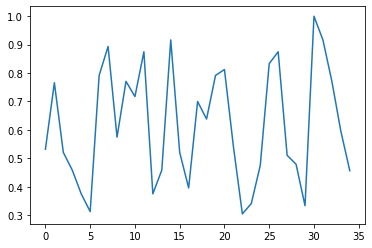

In [6]:
plt.plot(avg_AC)

In [7]:
my_df = pd.DataFrame(list(zip(subid, avg_AB1, avg_AB2, avg_AB3, avg_BC, avg_XY, avg_AC)), 
                     columns = ['participant', 'Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg XY', 'Avg AC'])

my_df

,participant,Avg AB1,Avg AB2,Avg AB3,Avg BC,Avg XY,Avg AC
0,A106MX66IVHW6T,0.562500,0.702128,0.770833,0.595745,0.422222,0.531915
1,A12FTSX85NQ8N9,0.636364,0.957447,0.979167,0.729167,0.702128,0.765957
2,A173A97OFDAX9F,0.340426,0.750000,0.854167,0.354167,0.437500,0.520833
3,A1DZMZTXWOM9MR,0.354167,0.854167,0.916667,0.625000,0.625000,0.458333
4,A1SISJL5ST2PWH,0.375000,0.479167,0.750000,0.312500,0.229167,0.375000
5,A1SOFLJOEQB591,0.645833,0.854167,0.875000,0.479167,0.489362,0.312500
6,A1T7EB1WEDCMXV,0.687500,0.937500,0.937500,0.645833,0.787234,0.791667
7,A1USR9JCAMDGM3,0.765957,0.872340,0.958333,0.770833,0.804348,0.893617
8,A1V1JNPU0KOA3X,0.583333,0.833333,0.875000,0.510638,0.479167,0.574468
9,A23EGLIF8IEH11,0.488889,0.826087,0.895833,0.645833,0.708333,0.770833


In [8]:
my_df.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mTurk_pavlovia_data/summaryXYdata/overall_inference.csv', index = False, header = True)

In [9]:
melted_df = pd.melt(my_df, id_vars=['participant'], value_vars=['Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg XY', 'Avg AC'], var_name='condition', value_name='Total_acc')
melted_df

,participant,condition,Total_acc
0,A106MX66IVHW6T,Avg AB1,0.562500
1,A12FTSX85NQ8N9,Avg AB1,0.636364
2,A173A97OFDAX9F,Avg AB1,0.340426
3,A1DZMZTXWOM9MR,Avg AB1,0.354167
4,A1SISJL5ST2PWH,Avg AB1,0.375000
...,...,...,...
205,APGX2WZ59OWDN,Avg AC,1.000000
206,AQ5KOKZQSZU0B,Avg AC,0.916667
207,AXKTYKCT9NGHS,Avg AC,0.770833
208,A11TPUPFP2S4MK,Avg AC,0.595745


## check if meeting threshold 75% accuracy in AB3

In [10]:
below_threshAB = []
below_threshBC = []
below_threshXY = []
yikes = []
for index, rows in melted_df.iterrows():
    if melted_df.condition[index] == 'Avg AB3' and melted_df.Total_acc[index] <= 0.75: # previously 0.66:
        subb = [melted_df.Total_acc[index], melted_df.participant[index]]
        below_threshAB.append(subb)
    if melted_df.condition[index] == 'Avg BC' and melted_df.Total_acc[index] <= 0.33:
        below_threshBC.append(melted_df.participant[index])
    if melted_df.condition[index] == 'Avg XY' and melted_df.Total_acc[index] <= 0.33:
        below_threshXY.append(melted_df.participant[index])
    if melted_df.condition[index] == 'Avg AC' and melted_df.Total_acc[index] <= 0.33:
        subb = [melted_df.Total_acc[index], melted_df.participant[index]]
        yikes.append(subb)
print('AB', below_threshAB)
print('BC', below_threshBC)
print('XY', below_threshXY)
print('AC', yikes)


AB [[0.75, 'A1SISJL5ST2PWH'], [0.7291666666666666, 'A2I9R6P8PE5FDL'], [0.75, 'A3BUWQ5C39GRQC'], [0.7291666666666666, 'A3UI9A8F9IDZTG'], [0.7045454545454546, 'A8UJNIY9R8S7W'], [0.6808510638297872, 'AFKB7F09OVKV7']]
BC ['A1SISJL5ST2PWH']
XY ['A1SISJL5ST2PWH', 'A2FGKKWP33DFWS']
AC [[0.3125, 'A1SOFLJOEQB591'], [0.30434782608695654, 'A39LVL4A92K88X']]


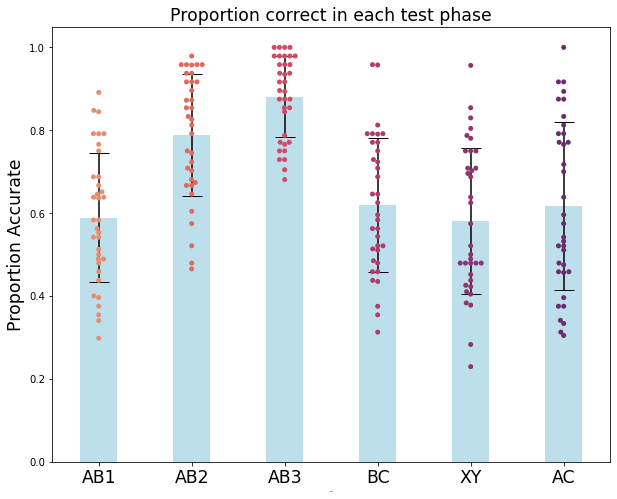

In [11]:
AB1_mean = np.mean(avg_AB1)
AB2_mean = np.mean(avg_AB2)
AB3_mean = np.mean(avg_AB3)
BC_mean = np.mean(avg_BC)
XY_mean = np.mean(avg_XY)
AC_mean = np.mean(avg_AC)

AB1_std = np.std(avg_AB1)
AB2_std = np.std(avg_AB2)
AB3_std = np.std(avg_AB3)
BC_std = np.std(avg_BC)
XY_std = np.std(avg_XY)
AC_std = np.std(avg_AC)


# Define labels, positions, bar heights and error bar heights
labels = ['AB1', 'AB2', 'AB3', 'BC', 'XY', 'AC']
x_pos = np.arange(len(labels))
CTEs = [AB1_mean, AB2_mean, AB3_mean, BC_mean, XY_mean, AC_mean]
error = [AB1_std, AB2_std, AB3_std, BC_std, XY_std, AC_std]

# Build the plot
fig, ax = plt.subplots(figsize=(10,8))
sns.swarmplot(data=melted_df, y = 'Total_acc', x = 'condition', palette = 'flare', ax = ax)

ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.8,
       width=0.4,
       color='lightblue',
       ecolor='black',
       capsize=10)
ax.set_ylabel('Proportion Accurate', fontsize = 'xx-large')
ax.set_xlabel('Test', fontsize = 2)
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize = 'xx-large')
ax.set_title('Proportion correct in each test phase', fontsize = 'xx-large')

# ### swarmplot
red = '#c04e01'
blue = '#0165fc'

# JUNK _________________________________

In [12]:
#df = print(df.replace(r'^\s*$', np.nan, regex=True))

subid = []
avg_AB1_neu = []
avg_AB2_neu = []
avg_AB3_neu = []
avg_BC_neu = []
avg_XY_neu = []
avg_AC_neu = []


avg_AB1_emo = []
avg_AB2_emo = []
avg_AB3_emo = []
avg_BC_emo = []
avg_XY_emo = []
avg_AC_emo = []


for pt_file in all_good:
    df = pd.read_csv(pt_file, header=0)
    df.columns = df.columns.str.replace(".", "_")
    participant_name = df.workerID[0]
    AB1corr = df.key_resp_corr
    AB2corr = df.key_resp_2_corr
    AB3corr = df.key_resp_3_corr
    BCXYcorr = df.key_resp_4_corr
    ACcorr = df.key_resp_5_corr
    

    AB1_trialresp = df.key_resp_keys
    AB2_trialresp = df.key_resp_2_keys
    AB3_trialresp = df.key_resp_3_keys
    BCXY_trialresp = df.key_resp_4_keys
    AC_trialresp = df.key_resp_5_keys
 
    
    AB1_trialresp_rt = df.key_resp_rt
    AB2_trialresp_rt = df.key_resp_2_rt
    AB3_trialresp_rt = df.key_resp_3_rt
    BCXY_trialresp_rt = df.key_resp_4_rt
    AC_trialresp_rt = df.key_resp_5_rt

    
    AB1_trialtype = df.test1_face_image
    AB2_trialtype = df.test2_face_image
    AB3_trialtype = df.test3_face_image
    BCXY_trialtype = df.testBC_face_image
    ACobjectcue = df.testAC_objectC_image

    overlap = df.test_overlap
    ACobjectA = df.orig_objectA_image
    ACobjectC = df.objectC_image4
    overlapB_faceimage = df.face_image4
    overlap_list = []
    emo_faced = []
    neu_faced = []
    test = []
    
    t_AB1trials = []
    t_AB2trials = []
    t_AB3trials = []
    t_BCtrials = []
    t_XYtrials = []
    t_ACtrials = []
    
    fear_AB1trials = []
    fear_AB2trials = []
    fear_AB3trials = []
    fear_BCtrials = []
    fear_XYtrials = []
    fear_ACtrials = []
    
    neut_AB1trials = []
    neut_AB2trials = []
    neut_AB3trials = []
    neut_BCtrials = []
    neut_XYtrials = []
    neut_ACtrials = []
    
    f_AB1corr = []
    f_AB2corr = []
    f_AB3corr = []
    f_BCcorr = []
    f_XYcorr = []
    f_ACcorr = []
  
    
    n_AB1corr = []
    n_AB2corr = []
    n_AB3corr = []
    n_BCcorr = []
    n_XYcorr = []
    n_ACcorr = []
    
    
    for index, row in df.iterrows():
        if pd.isnull(ACobjectC[index]) == False:
            overlap_valence = overlapB_faceimage[index]
            if overlap_valence[2:6] == 'fear':
                emo_faced.append(ACobjectC[index])
            if overlap_valence[2:6] == 'neut':
                neu_faced.append(ACobjectC[index]) 
    
    for index, row in df.iterrows():         
        if ACobjectcue[index] in emo_faced:
            fear_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                f_ACcorr.append(AC_trialresp_rt[index])
                
        if ACobjectcue[index] in neu_faced:
            neut_ACtrials.append(ACobjectcue[index])
            if ACcorr[index] == 1:
                n_ACcorr.append(AC_trialresp_rt[index]) 
    try:   
        prop_correctAC_emo = len(f_ACcorr)/len(fear_ACtrials)
        prop_correctAC_neut = len(n_ACcorr)/len(neut_ACtrials)
    except:
        pass
            
    for index, row in df.iterrows():
        valence1 = AB1_trialtype[index]
        valence2 = AB2_trialtype[index]
        valence3 = AB3_trialtype[index]
        valenceBC = BCXY_trialtype[index]
      
        
        if np.isnan(AB1_trialresp[index]) == False:
            #valence1 = AB1_trialtype[index]
            if valence1[2:6] == 'fear':
                fear_AB1trials.append(AB1_trialresp_rt[index])
                if AB1corr[index] == 1:
                    f_AB1corr.append(AB1_trialresp_rt[index])
            if valence1[2:6] == 'neut':
                neut_AB1trials.append(AB1_trialresp_rt[index])
                if AB1corr[index] == 1:
                    n_AB1corr.append(AB1_trialresp_rt[index])

        #prop_correct_emo = len(f_AB1corr)/len(fear_AB1trials)
        #prop_correct_neut = len(n_AB1corr)/len(neut_AB1trials)

        ##################################################################

        if np.isnan(AB2_trialresp[index]) == False:
            if valence2[2:6] == 'fear':
                fear_AB2trials.append(AB2_trialresp_rt[index])
                if AB2corr[index] == 1:
                    f_AB2corr.append(AB2_trialresp_rt[index])
            if valence2[2:6] == 'neut':
                neut_AB2trials.append(AB2_trialresp_rt[index])
                if AB2corr[index] == 1:
                    n_AB2corr.append(AB2_trialresp_rt[index])

       #################################################################

        if np.isnan(AB3_trialresp[index]) == False:
            if valence3[2:6] == 'fear':
                fear_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    f_AB3corr.append(AB3_trialresp_rt[index])
            elif valence3[2:6] == 'neut':
                neut_AB3trials.append(AB3_trialresp_rt[index])
                if AB3corr[index] == 1:
                    n_AB3corr.append(AB3_trialresp_rt[index])

        ######################################################################

        if np.isnan(BCXY_trialresp[index]) == False and overlap[index] == 'BC':
            if valenceBC[2:6] == 'fear':
                fear_BCtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    f_BCcorr.append(BCXY_trialresp_rt[index])
            elif valenceBC[2:6] == 'neut':
                neut_BCtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    n_BCcorr.append(BCXY_trialresp_rt[index])

        #############################################################
        
        if np.isnan(BCXY_trialresp[index]) == False and overlap[index] == 'XY':
            if valenceBC[2:6] == 'fear':
                fear_XYtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    f_XYcorr.append(BCXY_trialresp_rt[index])
            elif valenceBC[2:6] == 'neut':
                neut_XYtrials.append(BCXY_trialresp_rt[index])
                if BCXYcorr[index] == 1:
                    n_XYcorr.append(BCXY_trialresp_rt[index])

        #############################################################

                    
    try:
        prop_correct_emo = len(f_AB1corr)/len(fear_AB1trials)
        prop_correct_neut = len(n_AB1corr)/len(neut_AB1trials)
        prop_correct2_emo = len(f_AB2corr)/len(fear_AB2trials)
        prop_correct2_neut = len(n_AB2corr)/len(neut_AB2trials)
        prop_correct3_emo = len(f_AB3corr)/len(fear_AB3trials)
        prop_correct3_neut = len(n_AB3corr)/len(neut_AB3trials)
        prop_correctBC_emo = len(f_BCcorr)/len(fear_BCtrials)
        prop_correctBC_neut = len(n_BCcorr)/len(neut_BCtrials)
        prop_correctXY_emo = len(f_XYcorr)/len(fear_XYtrials)
        prop_correctXY_neut = len(n_XYcorr)/len(neut_XYtrials)

    except:
            pass
       
    ##############################################################################
    ## THE AC TEST!! 

    subid.append(participant_name)

    avg_AB1_neu.append(prop_correct_neut)
    avg_AB2_neu.append(prop_correct2_neut)
    avg_AB3_neu.append(prop_correct3_neut)
    avg_BC_neu.append(prop_correctBC_neut)
    avg_XY_neu.append(prop_correctXY_neut)
    avg_AC_neu.append(prop_correctAC_neut)


    avg_AB1_emo.append(prop_correct_emo)
    avg_AB2_emo.append(prop_correct2_emo)
    avg_AB3_emo.append(prop_correct3_emo)
    avg_BC_emo.append(prop_correctBC_emo)
    avg_XY_emo.append(prop_correctXY_emo)
    avg_AC_emo.append(prop_correctAC_emo)
 
    

In [13]:
val_df = pd.DataFrame(list(zip(subid, avg_AB1_neu, avg_AB2_neu, avg_AB3_neu, avg_BC_neu, avg_XY_neu, avg_AC_neu, avg_AB1_emo, avg_AB2_emo, avg_AB3_emo, avg_BC_emo, avg_XY_emo, avg_AC_emo)), 
                     columns = ['participant', 'Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg XY', 'Avg AC', 'Avg AB1_emo', 'Avg AB2_emo', 'Avg AB3_emo', 'Avg BC_emo', 'Avg XY_emo', 'Avg AC_emo'])

val_df.to_csv(r'/Users/ayesh/Desktop/Gradstuff/contingentproject/mem-gen_study/XY_mTurk_pavlovia_data/summaryXYdata/overall_inference_valence.csv', index = False, header = True)

val_df


,participant,Avg AB1,Avg AB2,Avg AB3,Avg BC,Avg XY,Avg AC,Avg AB1_emo,Avg AB2_emo,Avg AB3_emo,Avg BC_emo,Avg XY_emo,Avg AC_emo
0,A106MX66IVHW6T,0.666667,0.875000,0.916667,0.666667,0.458333,0.583333,0.458333,0.521739,0.625000,0.521739,0.347826,0.458333
1,A12FTSX85NQ8N9,0.650000,1.000000,1.000000,0.750000,0.750000,0.791667,0.625000,0.916667,0.958333,0.708333,0.666667,0.708333
2,A173A97OFDAX9F,0.478261,0.875000,0.791667,0.333333,0.541667,0.583333,0.208333,0.625000,0.916667,0.375000,0.333333,0.458333
3,A1DZMZTXWOM9MR,0.416667,0.875000,0.875000,0.708333,0.666667,0.500000,0.291667,0.833333,0.958333,0.541667,0.583333,0.416667
4,A1SISJL5ST2PWH,0.333333,0.458333,0.625000,0.333333,0.250000,0.291667,0.416667,0.500000,0.875000,0.291667,0.208333,0.458333
5,A1SOFLJOEQB591,0.666667,0.833333,0.958333,0.750000,0.541667,0.333333,0.625000,0.875000,0.791667,0.208333,0.416667,0.291667
6,A1T7EB1WEDCMXV,0.708333,0.958333,0.916667,0.750000,0.750000,0.791667,0.666667,0.916667,0.958333,0.541667,0.833333,0.791667
7,A1USR9JCAMDGM3,0.791667,0.913043,0.916667,0.750000,0.958333,0.875000,0.739130,0.833333,1.000000,0.791667,0.652174,0.875000
8,A1V1JNPU0KOA3X,0.750000,0.916667,0.958333,0.583333,0.541667,0.541667,0.416667,0.750000,0.791667,0.434783,0.416667,0.583333
9,A23EGLIF8IEH11,0.454545,0.826087,0.916667,0.625000,0.916667,0.833333,0.521739,0.826087,0.875000,0.666667,0.500000,0.708333


In [14]:
valence_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg AB1', 'Avg AB2', 'Avg AB3', 'Avg BC', 'Avg XY','Avg AC', 'Avg AB1_emo', 'Avg AB2_emo', 'Avg AB3_emo', 'Avg BC_emo', 'Avg XY_emo', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
valence_df

,participant,condition,Total_acc
0,A106MX66IVHW6T,Avg AB1,0.666667
1,A12FTSX85NQ8N9,Avg AB1,0.650000
2,A173A97OFDAX9F,Avg AB1,0.478261
3,A1DZMZTXWOM9MR,Avg AB1,0.416667
4,A1SISJL5ST2PWH,Avg AB1,0.333333
...,...,...,...
415,APGX2WZ59OWDN,Avg AC_emo,1.000000
416,AQ5KOKZQSZU0B,Avg AC_emo,0.916667
417,AXKTYKCT9NGHS,Avg AC_emo,0.666667
418,A11TPUPFP2S4MK,Avg AC_emo,0.583333


In [15]:
discard2 = []
for index, rows in valence_df.iterrows():
    if valence_df.condition[index] == 'Avg AB3_emo' and valence_df.Total_acc[index] <= 0.60:
        discard2.append(valence_df.participant[index])
print(discard2)

[]


In [16]:
discard3 = []
for index, rows in valence_df.iterrows():
    if valence_df.condition[index] == 'Avg AC_emo' and valence_df.Total_acc[index] <= 0.33:
        discard3.append(valence_df.participant[index])
print(discard3)

['A1SOFLJOEQB591', 'A2I9R6P8PE5FDL', 'A2PSR3CMNR1R9X', 'A3BO3HMV0F7Q5H', 'A3BUWQ5C39GRQC', 'AFKB7F09OVKV7']


In [17]:
valence_df.loc[valence_df['condition'] == 'Avg AB1', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg AB2', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg AB3', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg BC', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg XY', 'valence'] = 'c-neutral'
valence_df.loc[valence_df['condition'] == 'Avg AC', 'valence'] = 'c-neutral'


valence_df.loc[valence_df['condition'] == 'Avg AB1_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg AB2_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg AB3_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg BC_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg XY_emo', 'valence'] = 'fearful'
valence_df.loc[valence_df['condition'] == 'Avg AC_emo', 'valence'] = 'fearful'



In [18]:
valence_df

,participant,condition,Total_acc,valence
0,A106MX66IVHW6T,Avg AB1,0.666667,c-neutral
1,A12FTSX85NQ8N9,Avg AB1,0.650000,c-neutral
2,A173A97OFDAX9F,Avg AB1,0.478261,c-neutral
3,A1DZMZTXWOM9MR,Avg AB1,0.416667,c-neutral
4,A1SISJL5ST2PWH,Avg AB1,0.333333,c-neutral
...,...,...,...,...
415,APGX2WZ59OWDN,Avg AC_emo,1.000000,fearful
416,AQ5KOKZQSZU0B,Avg AC_emo,0.916667,fearful
417,AXKTYKCT9NGHS,Avg AC_emo,0.666667,fearful
418,A11TPUPFP2S4MK,Avg AC_emo,0.583333,fearful


In [19]:
comp_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg AB3', 'Avg AB3_emo', 'Avg BC', 'Avg BC_emo', 'Avg XY', 'Avg XY_emo', 'Avg AC', 'Avg AC_emo'], var_name='condition', value_name='Total_acc')
comp_df

,participant,condition,Total_acc
0,A106MX66IVHW6T,Avg AB3,0.916667
1,A12FTSX85NQ8N9,Avg AB3,1.000000
2,A173A97OFDAX9F,Avg AB3,0.791667
3,A1DZMZTXWOM9MR,Avg AB3,0.875000
4,A1SISJL5ST2PWH,Avg AB3,0.625000
...,...,...,...
275,APGX2WZ59OWDN,Avg AC_emo,1.000000
276,AQ5KOKZQSZU0B,Avg AC_emo,0.916667
277,AXKTYKCT9NGHS,Avg AC_emo,0.666667
278,A11TPUPFP2S4MK,Avg AC_emo,0.583333


In [20]:
comp_df.loc[comp_df['condition'] == 'Avg AB3', 'valence'] = 'c-neutral'
comp_df.loc[comp_df['condition'] == 'Avg BC', 'valence'] = 'c-neutral'
comp_df.loc[comp_df['condition'] == 'Avg XY', 'valence'] = 'c-neutral'
comp_df.loc[comp_df['condition'] == 'Avg AC', 'valence'] = 'c-neutral'


comp_df.loc[comp_df['condition'] == 'Avg AB3_emo', 'valence'] = 'fearful'
comp_df.loc[comp_df['condition'] == 'Avg BC_emo', 'valence'] = 'fearful'
comp_df.loc[comp_df['condition'] == 'Avg XY_emo', 'valence'] = 'fearful'
comp_df.loc[comp_df['condition'] == 'Avg AC_emo', 'valence'] = 'fearful'



comp_df.loc[comp_df['condition'] == 'Avg AB3', 'Test'] = 'AB3'
comp_df.loc[comp_df['condition'] == 'Avg BC', 'Test'] = 'BC'
comp_df.loc[comp_df['condition'] == 'Avg XY', 'Test'] = 'XY'
comp_df.loc[comp_df['condition'] == 'Avg AC', 'Test'] = 'AC'


comp_df.loc[comp_df['condition'] == 'Avg AB3_emo', 'Test'] = 'AB3'
comp_df.loc[comp_df['condition'] == 'Avg BC_emo', 'Test'] = 'BC'
comp_df.loc[comp_df['condition'] == 'Avg XY_emo', 'Test'] = 'XY'
comp_df.loc[comp_df['condition'] == 'Avg AC_emo', 'Test'] = 'AC'


In [21]:
comp_df

,participant,condition,Total_acc,valence,Test
0,A106MX66IVHW6T,Avg AB3,0.916667,c-neutral,AB3
1,A12FTSX85NQ8N9,Avg AB3,1.000000,c-neutral,AB3
2,A173A97OFDAX9F,Avg AB3,0.791667,c-neutral,AB3
3,A1DZMZTXWOM9MR,Avg AB3,0.875000,c-neutral,AB3
4,A1SISJL5ST2PWH,Avg AB3,0.625000,c-neutral,AB3
...,...,...,...,...,...
275,APGX2WZ59OWDN,Avg AC_emo,1.000000,fearful,AC
276,AQ5KOKZQSZU0B,Avg AC_emo,0.916667,fearful,AC
277,AXKTYKCT9NGHS,Avg AC_emo,0.666667,fearful,AC
278,A11TPUPFP2S4MK,Avg AC_emo,0.583333,fearful,AC


C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


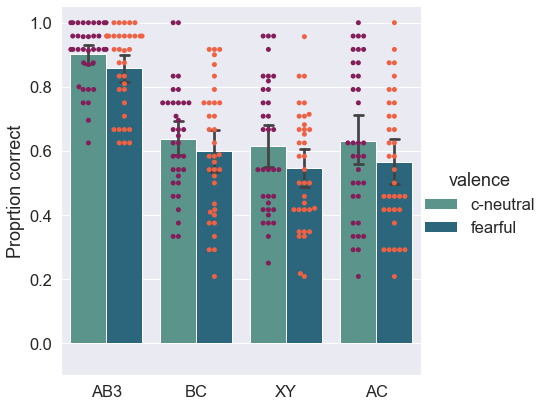

In [22]:
sns.set(font_scale = 1.5)
g = sns.catplot(x="Test", y="Total_acc", hue="valence", data=comp_df,
 height=6, kind="bar", palette="crest", capsize=.1)
g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=comp_df, palette="rocket", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Proprtion correct")
plt.xlabel('')
plt.show()

In [23]:
preAC_comp_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg AB1', 'Avg AB1_emo', 'Avg AB2', 'Avg AB2_emo','Avg AB3', 'Avg AB3_emo', 'Avg BC', 'Avg BC_emo', 'Avg XY', 'Avg XY_emo'], var_name='condition', value_name='Total_acc')
preAC_comp_df

,participant,condition,Total_acc
0,A106MX66IVHW6T,Avg AB1,0.666667
1,A12FTSX85NQ8N9,Avg AB1,0.650000
2,A173A97OFDAX9F,Avg AB1,0.478261
3,A1DZMZTXWOM9MR,Avg AB1,0.416667
4,A1SISJL5ST2PWH,Avg AB1,0.333333
...,...,...,...
345,APGX2WZ59OWDN,Avg XY_emo,0.956522
346,AQ5KOKZQSZU0B,Avg XY_emo,0.708333
347,AXKTYKCT9NGHS,Avg XY_emo,0.541667
348,A11TPUPFP2S4MK,Avg XY_emo,0.500000


In [24]:
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB3', 'valence'] = 'c-neutral'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg BC', 'valence'] = 'c-neutral'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB2', 'valence'] = 'c-neutral'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB1', 'valence'] = 'c-neutral'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg XY', 'valence'] = 'c-neutral'


preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB3_emo', 'valence'] = 'fearful'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg BC_emo', 'valence'] = 'fearful'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB2_emo', 'valence'] = 'fearful'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB1_emo', 'valence'] = 'fearful'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg XY_emo', 'valence'] = 'fearful'


preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB3', 'Test'] = 'AB3'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg BC', 'Test'] = 'BC'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB2', 'Test'] = 'AB2'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB1', 'Test'] = 'AB1'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg XY', 'Test'] = 'XY'

preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB3_emo', 'Test'] = 'AB3'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg BC_emo', 'Test'] = 'BC'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB2_emo', 'Test'] = 'AB2'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg AB1_emo', 'Test'] = 'AB1'
preAC_comp_df.loc[preAC_comp_df['condition'] == 'Avg XY_emo', 'Test'] = 'XY'

In [25]:
preAC_comp_df

,participant,condition,Total_acc,valence,Test
0,A106MX66IVHW6T,Avg AB1,0.666667,c-neutral,AB1
1,A12FTSX85NQ8N9,Avg AB1,0.650000,c-neutral,AB1
2,A173A97OFDAX9F,Avg AB1,0.478261,c-neutral,AB1
3,A1DZMZTXWOM9MR,Avg AB1,0.416667,c-neutral,AB1
4,A1SISJL5ST2PWH,Avg AB1,0.333333,c-neutral,AB1
...,...,...,...,...,...
345,APGX2WZ59OWDN,Avg XY_emo,0.956522,fearful,XY
346,AQ5KOKZQSZU0B,Avg XY_emo,0.708333,fearful,XY
347,AXKTYKCT9NGHS,Avg XY_emo,0.541667,fearful,XY
348,A11TPUPFP2S4MK,Avg XY_emo,0.500000,fearful,XY


C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\ayesh\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


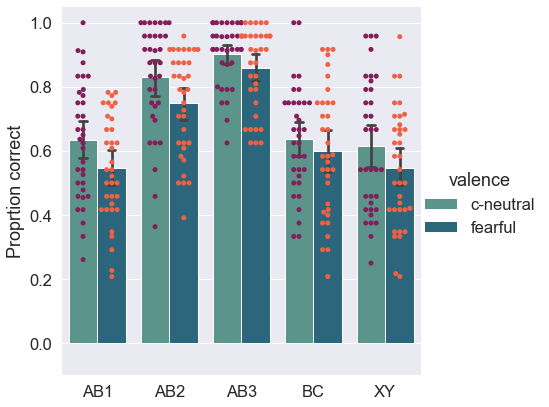

In [26]:
sns.set(font_scale = 1.5)
g = sns.catplot(x="Test", y="Total_acc", hue="valence", data=preAC_comp_df,
 height=6, kind="bar", palette="crest", capsize=.1)
g = sns.swarmplot(x="Test", y="Total_acc", hue="valence", data=preAC_comp_df, palette="rocket", dodge=True)
g.legend_.remove()
#g.figure.savefig('mean_bias_context_age_source_corr_bars.pdf')
plt.ylim(-0.1, 1.05)
plt.ylabel("Proprtion correct")
plt.xlabel('')
plt.show()

In [27]:
AB_comp_df = pd.melt(val_df, id_vars=['participant'], value_vars=['Avg AB3', 'Avg AB3_emo', 'Avg BC', 'Avg BC_emo', 'Avg XY', 'Avg XY_emo'], var_name='condition', value_name='Total_acc')
AB_comp_df

,participant,condition,Total_acc
0,A106MX66IVHW6T,Avg AB3,0.916667
1,A12FTSX85NQ8N9,Avg AB3,1.000000
2,A173A97OFDAX9F,Avg AB3,0.791667
3,A1DZMZTXWOM9MR,Avg AB3,0.875000
4,A1SISJL5ST2PWH,Avg AB3,0.625000
...,...,...,...
193,APGX2WZ59OWDN,Avg XY_emo,0.956522
194,AQ5KOKZQSZU0B,Avg XY_emo,0.708333
195,AXKTYKCT9NGHS,Avg XY_emo,0.541667
196,A11TPUPFP2S4MK,Avg XY_emo,0.500000


In [28]:
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg AB3', 'valence'] = 'AB-control'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC', 'valence'] = 'BC-control'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC', 'valence'] = 'XY-control'


AB_comp_df.loc[AB_comp_df['condition'] == 'Avg AB3_emo', 'valence'] = 'AB-fearful'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC_emo', 'valence'] = 'BC-fearful'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal_emo', 'valence'] = 'AB-fearful'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BCfinal_emo', 'valence'] = 'BC-fearful'


AB_comp_df.loc[AB_comp_df['condition'] == 'Avg AB3', 'Test'] = 'pre'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC', 'Test'] = 'pre'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal', 'Test'] = 'post'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BCfinal', 'Test'] = 'post'

AB_comp_df.loc[AB_comp_df['condition'] == 'Avg AB3_emo', 'Test'] = 'pre'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BC_emo', 'Test'] = 'pre'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg ABfinal_emo', 'Test'] = 'post'
AB_comp_df.loc[AB_comp_df['condition'] == 'Avg BCfinal_emo', 'Test'] = 'post'

In [29]:
AB_comp_df

,participant,condition,Total_acc,valence,Test
0,A106MX66IVHW6T,Avg AB3,0.916667,AB-control,pre
1,A12FTSX85NQ8N9,Avg AB3,1.000000,AB-control,pre
2,A173A97OFDAX9F,Avg AB3,0.791667,AB-control,pre
3,A1DZMZTXWOM9MR,Avg AB3,0.875000,AB-control,pre
4,A1SISJL5ST2PWH,Avg AB3,0.625000,AB-control,pre
...,...,...,...,...,...
193,APGX2WZ59OWDN,Avg XY_emo,0.956522,NaN,NaN
194,AQ5KOKZQSZU0B,Avg XY_emo,0.708333,NaN,NaN
195,AXKTYKCT9NGHS,Avg XY_emo,0.541667,NaN,NaN
196,A11TPUPFP2S4MK,Avg XY_emo,0.500000,NaN,NaN


ValueError: operands could not be broadcast together with shapes (33,) (0,) 

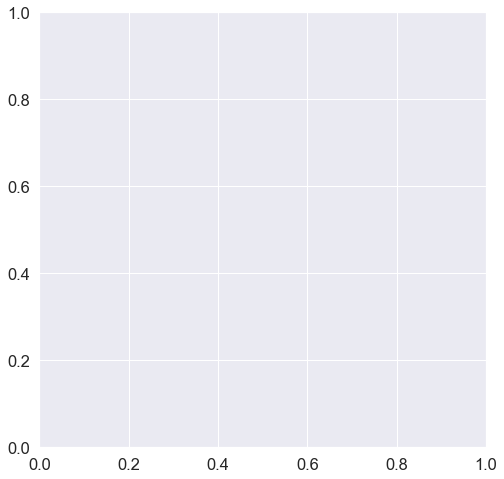

In [30]:
#check for interference
#here if there is a difference between pre and post AC test, it will be indicated by different colors. 
#If pre AC performance is better than the post AC performance, line is blue, otherwise red!
#note that if there is no difference, i.e, if pre-post = 0, the line is still red!
red = '#c04e01'
blue = '#0165fc'
fig, ax = plt.subplots(figsize=(8, 8))

# Set up list to track sites
valences = []

i = 1.0
for valence, subdf in AB_comp_df.groupby('valence'):
    valences.append(valence)
    # Get the values for healthy and disease patients
    h = subdf.query('Test == "pre"')['Total_acc'].values
    d = subdf.query('Test == "post"')['Total_acc'].values
    # Set up the x-axis values
    x1 = i - 0.2
    x2 = i + 0.2
 # Set up line color
    line_colors = (h - d) > 0
    line_colors = [blue if j else red for j in line_colors]
    # Also set up alpha values to make the lines slightly transparent
    alphas = [0.4]*len(line_colors)
    # Plot the lines connecting the dots
    for hi, di, ci, ai in zip(h, d, line_colors, alphas):
        ax.plot([x1, x2], [hi, di], c=ci, alpha=ai)
 # Plot the points
 # Note: s=25 increase the default point size, lw=0.5 decreases the default point line width
    ax.scatter(len(h)*[x1-0.01], h, c=blue,
    s=25, lw=0.5, label='Pre-AC')
    ax.scatter(len(d)*[x2+0.01], d, c=red,
    s=25, lw=0.5, label='Post-AC')
 # Update x-axis
    i += 1
# Fix the axes and labels
ax.set_xticks([1, 2, 3, 4])
_ = ax.set_xticklabels(valences, fontsize='large')
# Add legend and fix it to show only the first two elements
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles[0:2], labels[0:2],
    fontsize='large',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
    scatterpoints=1)
lgd.legendHandles[0]._sizes = [80]
lgd.legendHandles[1]._sizes = [80]
ax.set_xlabel('Test phase')
ax.set_ylabel('Response Accuracy')
    #fig.savefig('mean_bias_context_age_source_corr_points.pdf')

In [57]:
h-d

array([ 0.08333333,  0.01992754,  0.125     , -0.05681818,  0.        ,
        0.        , -0.18452381, -0.08333333,  0.07608696, -0.08333333,
        0.19565217,  0.16666667, -0.08333333, -0.04166667,  0.08333333,
       -0.125     , -0.11594203,  0.        , -0.3134058 ,  0.19762846,
       -0.08333333,  0.01086957, -0.04166667, -0.16666667, -0.19384058,
       -0.20833333,  0.04166667,  0.08333333,  0.125     ,  0.04166667])

In [58]:
line_colors

['#0165fc',
 '#0165fc',
 '#0165fc',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#0165fc',
 '#c04e01',
 '#0165fc',
 '#0165fc',
 '#c04e01',
 '#c04e01',
 '#0165fc',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#0165fc',
 '#c04e01',
 '#0165fc',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#c04e01',
 '#0165fc',
 '#0165fc',
 '#0165fc',
 '#0165fc']